In [3]:
import pandas as pd 
df = pd.read_csv('winequality-red.csv')
df.sample(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
314,7.4,0.36,0.29,2.6,0.087,26.0,72.0,0.99645,3.39,0.68,11.0,5
1000,7.5,0.43,0.30,2.2,0.062,6.0,12.0,0.99495,3.44,0.72,11.5,7
1099,8.6,0.52,0.38,1.5,0.096,5.0,18.0,0.99666,3.20,0.52,9.4,5
1417,7.3,0.34,0.33,2.5,0.064,21.0,37.0,0.99520,3.35,0.77,12.1,7


In [6]:
print(df.quality.unique())
len(df)

[2 3 4 1 5 0]


1599

In [5]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5}
# you can use the map function of pandas with any dictionary to convert the values in a given
# column to values in the dictionary
df.loc[:, 'quality'] = df.quality.map(quality_mapping)

In [7]:
# use ample with frac=1 to shuffle the dataframe
# we reser the indices since they change after shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)

# top 1000 roes for training
df_train = df.head(1000)

# bottom 599 for testing validation
df_test = df.tail(599)

In [13]:
from sklearn import tree
from sklearn import metrics
# initialize decision tree classifier class
# with a max depth of 3
clf = tree.DecisionTreeClassifier(max_depth = 3)

# choose columns you want to train on
cols =['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

#train model on the provided features 
clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [14]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculate the accuracy of predictions for training and test
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

print(train_accuracy, test_accuracy)

0.583 0.5742904841402338


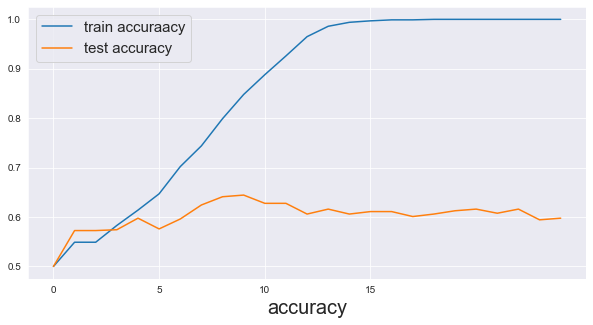

In [17]:
# accuracies as funcitn of tree deth
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# initialize lists to store accuracies
train_accuracies = [0.5]
test_accuracies = [0.5]

for depth in range(1,25):
    # init the model
    clf = tree.DecisionTreeClassifier(max_depth = depth)
    cols =['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

    # fit model
    clf.fit(df_train[cols], df_train.quality)
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])

    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

    # append results
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# create two plots
plt.figure(figsize = (10,5))
sns.set_style('darkgrid')
plt.plot(train_accuracies, label='train accuraacy')
plt.plot(test_accuracies, label = 'test accuracy')
plt.legend(loc = 'upper left', prop = {'size' :15})
plt.xticks(range(0, 16, 5))
plt.xlabel('max_depth', size = 20)
plt.xlabel('accuracy', size = 20)
plt.show()

# model overfits
